1. goal_set.p: 코드에 사용된 목표 세트입니다. goal_set에는 goal_set["train"] 및 goal_set["test"]를 통해 방문할 수 있는 훈련 세트와 테스트 세트가 포함되어 있습니다. 각 하위 집합은 논문에 설명된 사용자 목표 목록이며 각 사용자 목표는 세 개의 키가 있는 사전입니다. "consult_id"는 사용자 ID, "group_id"는 사용자 목표가 속한 그룹, "disease_tag" 는 사용자가 앓고 있는 질병이고 "목표"는 슬롯(요청 슬롯, 암시적 증상 및 명시적 증상)의 조합입니다.  
  
2. action_set.p: 이 의료 DS에 대해 사전 정의된 작업 유형입니다.

3. disease_symptom.p: 질병별 증상 모음.

4. Slot_set.p: 우리 논문에서 설명한 바와 같이 정규화된 증상과 특수 슬롯 질병으로 구성된 슬롯 세트입니다.

이제 목표 세트에는 30,000개의 사용자 목표와 총 90개의 질병이 포함되며, 또한 9개의 질병 그룹이 포함되고 각 그룹에는 10개의 질병이 포함됩니다.

우리가 선택한 그룹 ID는 [1,4,5,6,7,12,13,14,19] 중 하나이며 이는 ICD-10-CM의 장 번호에 해당합니다.

label1부터 label19까지의 폴더는 각 작업자에 대한 하위 수준 정책 교육에 사용됩니다.

각 폴더에는 이 그룹의 질병에만 해당하는 자체 "goal_set.p", "action_set.p", "disease_symptom.p" 및 "slot_set.p"가 포함되어 있습니다.

자세한 내용은 우리의 논문을 참조하세요.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
import pickle

goal_set = pickle.load(open('synthetic_dataset/goal_set.p', 'rb'))
action_set = pickle.load(open('synthetic_dataset/action_set.p', 'rb'))
disease_symptom = pickle.load(open('synthetic_dataset/disease_symptom.p', 'rb'))
slot_set = pickle.load(open('synthetic_dataset/slot_set.p', 'rb'))

In [6]:
goal_set

{'train': [{'consult_id': 1059,
   'disease_tag': 'Central retinal artery or vein occlusion',
   'group_id': '7',
   'goal': {'request_slots': {'disease': 'UNK'},
    'explicit_inform_slots': {'Spots or clouds in vision': True},
    'implicit_inform_slots': {'Diminished vision': True,
     'Symptoms of eye': True,
     'Pain in eye': True}}},
  {'consult_id': 19510,
   'disease_tag': 'Degenerative disc disease',
   'group_id': '6',
   'goal': {'request_slots': {'disease': 'UNK'},
    'explicit_inform_slots': {'Shoulder pain': True},
    'implicit_inform_slots': {'Back pain': True,
     'Low back pain': True,
     'Neck pain': True,
     'Hip pain': True,
     'Ache all over': True}}},
  {'consult_id': 25630,
   'disease_tag': 'Diabetic retinopathy',
   'group_id': '4',
   'goal': {'request_slots': {'disease': 'UNK'},
    'explicit_inform_slots': {'Foreign body sensation in eye': True},
    'implicit_inform_slots': {}}},
  {'consult_id': 1467,
   'disease_tag': 'Chronic back pain',
   '

In [7]:
action_set  #이 의료 DS에 대해 사전 정의된 작업 유형입니다.

{'request': 0,
 'inform': 1,
 'confirm_question': 2,
 'confirm_answer': 3,
 'greeting': 4,
 'closing': 5,
 'multiple_choice': 6,
 'thanks': 7,
 'welcome': 8,
 'deny': 9,
 'not_sure': 10}

In [8]:
disease_symptom  #질병별 증상 모음,  각 질병에 대한 증상과 해당 증상이 발생할 확률에 관한 정보

{'Cat scratch disease': {'index': 0,
  'symptom': {'Neck swelling': 0.74,
   'Skin swelling': 0.74,
   'Groin mass': 0.57,
   'Skin rash': 0.57,
   'Loss of sensation': 0.57,
   'Arm swelling': 0.57,
   'Skin lesion': 0.57,
   'Headache': 0.57,
   'Fever': 0.57,
   'Swollen eye': 0.57,
   'Arm lump or mass': 0.57,
   'Itchy eyelid': 0.05}},
 'Dengue fever': {'index': 1,
  'symptom': {'Sore throat': 1.0,
   'Fever': 1.0,
   'Shoulder cramps or spasms': 0.32,
   'Ankle pain': 0.32,
   'Wrist pain': 0.32,
   'Pain during pregnancy': 0.32,
   'Joint stiffness or tightness': 0.32,
   'Excessive anger': 0.32,
   'Pain or soreness of breast': 0.32,
   'Knee lump or mass': 0.32,
   'Facial pain': 0.32,
   'Pain in eye': 0.32}},
 'Gas gangrene': {'index': 2,
  'symptom': {'Sharp abdominal pain': 1.0,
   'Shoulder cramps or spasms': 0.32,
   'Excessive anger': 0.32,
   'Ankle pain': 0.32,
   'Wrist pain': 0.32,
   'Pain during pregnancy': 0.32,
   'Facial pain': 0.32,
   'Joint stiffness or tigh

In [9]:
slot_set   #우리 논문에서 설명한 바와 같이 정규화된 증상과 특수 슬롯 질병으로 구성된 슬롯 세트입니다.

{'Cough': 0,
 'Swollen eye': 1,
 'Pulling at ears': 2,
 'Arm weakness': 3,
 'Skin growth': 4,
 'Eye redness': 5,
 'Pelvic pain': 6,
 'Palpitations': 7,
 'Itchy scalp': 8,
 'Thirst': 9,
 'Anxiety and nervousness': 10,
 'Skin dryness, peeling, scaliness, or roughness': 11,
 'Fears and phobias': 12,
 'Depression': 13,
 'Wrist lump or mass': 14,
 'Pain during intercourse': 15,
 'Diarrhea': 16,
 'Hurts to breath': 17,
 'Eye burns or stings': 18,
 'Seizures': 19,
 'Disturbance of smell or taste': 20,
 'Diminished hearing': 21,
 'Redness in ear': 22,
 'Leg weakness': 23,
 'Feet turned in': 24,
 'Muscle pain': 25,
 'Frequent menstruation': 26,
 'Neck cramps or spasms': 27,
 'Excessive appetite': 28,
 'Acne or pimples': 29,
 'Retention of urine': 30,
 'Skin rash': 31,
 'Skin on leg or foot looks infected': 32,
 'Infrequent menstruation': 33,
 'Drug abuse': 34,
 'Back cramps or spasms': 35,
 'Low back pain': 36,
 'Itchy eyelid': 37,
 'Eye deviation': 38,
 'Hand or finger lump or mass': 39,
 'Kne

In [10]:
lengths = {key: len(value) for key, value in goal_set.items()}
print(lengths)

{'train': 24000, 'test': 6000, 'validate': 0}


### goal_set.p 모양

goal_set = {  

    'train': [    
   
        [feature_1_value, feature_2_value, ..., feature_n_value],  # data_point_1    
        [feature_1_value, feature_2_value, ..., feature_n_value],  # data_point_2    
         ...    
        [feature_1_value, feature_2_value, ..., feature_n_value]   # data_point_24000  
    ],  
    
    'test': [  
        [feature_1_value, feature_2_value, ..., feature_n_value],  # data_point_1  
        [feature_1_value, feature_2_value, ..., feature_n_value],  # data_point_2  
         ...  
        [feature_1_value, feature_2_value, ..., feature_n_value]   # data_point_6000  
    ],  
    
    'validate': []  # 데이터가 없는 경우 빈 리스트  
}

이 상태에서 df = pd.DataFrame(data_set) 하면 ValueError: arrays must all be same length 에러뜸.  
train, test, validate 데이터 분리하기

In [11]:
train_data = goal_set['train']
test_data = goal_set['test']
validate_data = goal_set['validate']

# goal_set.p 의 train data 살펴보기

In [12]:
train_df = pd.DataFrame(train_data)

In [13]:
train_df.shape    # 데이터 수 24000개, 속성 4개

(24000, 4)

In [14]:
train_df.info

<bound method DataFrame.info of        consult_id                               disease_tag group_id  \
0            1059  Central retinal artery or vein occlusion        7   
1           19510                 Degenerative disc disease        6   
2           25630                      Diabetic retinopathy        4   
3            1467                         Chronic back pain       13   
4            5780                              Air embolism       19   
...           ...                                       ...      ...   
23995        5390                                Concussion       19   
23996        6207                          Cushing syndrome        4   
23997        9328                              Fibromyalgia       13   
23998        5498                              Dengue fever        1   
23999       15154                                 Flat feet       13   

                                                    goal  
0      {'request_slots': {'disease': 'UNK'},

In [15]:
## 상위 5개 데이터 확인하기

train_df.head()

,consult_id,disease_tag,group_id,goal
0,1059,Central retinal artery or vein occlusion,7,"{'request_slots': {'disease': 'UNK'}, 'explici..."
1,19510,Degenerative disc disease,6,"{'request_slots': {'disease': 'UNK'}, 'explici..."
2,25630,Diabetic retinopathy,4,"{'request_slots': {'disease': 'UNK'}, 'explici..."
3,1467,Chronic back pain,13,"{'request_slots': {'disease': 'UNK'}, 'explici..."
4,5780,Air embolism,19,"{'request_slots': {'disease': 'UNK'}, 'explici..."


In [16]:
train_df.columns 

Index(['consult_id', 'disease_tag', 'group_id', 'goal'], dtype='object')

In [17]:
train_df.dtypes

consult_id      int64
disease_tag    object
group_id       object
goal           object
dtype: object

In [18]:
train_df['consult_id'].nunique()

24000

In [19]:
train_df['disease_tag'].nunique()

90

In [20]:
train_df['group_id'].nunique()

9

In [21]:
# train_df.describe()

In [22]:
# train_df.corr()

In [23]:
train_df.isnull().sum()

consult_id     0
disease_tag    0
group_id       0
goal           0
dtype: int64

In [24]:
# group_id 기준으로 그룹나누기
grouped_df = train_df.groupby('group_id')

In [25]:
# 결과 출력
for group_id, group_data in grouped_df:
    print("Group ID:", group_id)
    print(group_data)

Group ID: 1
       consult_id          disease_tag group_id  \
17          16360  Granuloma inguinale        1   
32          26439            Acariasis        1   
44             86           Chickenpox        1   
47          19386           Chickenpox        1   
57           7769       Chagas disease        1   
...           ...                  ...      ...   
23974       10484            Chlamydia        1   
23981       25460       Chagas disease        1   
23984       16854           Chickenpox        1   
23993        8383  Cat scratch disease        1   
23998        5498         Dengue fever        1   

                                                    goal  
17     {'request_slots': {'disease': 'UNK'}, 'explici...  
32     {'request_slots': {'disease': 'UNK'}, 'explici...  
44     {'request_slots': {'disease': 'UNK'}, 'explici...  
47     {'request_slots': {'disease': 'UNK'}, 'explici...  
57     {'request_slots': {'disease': 'UNK'}, 'explici...  
...                  

       consult_id                     disease_tag group_id  \
1           19510       Degenerative disc disease        6   
18          15081  Extrapyramidal effect of drugs        6   
20          18363                    Encephalitis        6   
22           9641  Extrapyramidal effect of drugs        6   
30           6047               Alzheimer disease        6   
...           ...                             ...      ...   
23940       10906                    Encephalitis        6   
23952        6374  Complex regional pain syndrome        6   
23962       21832         Guillain Barre syndrome        6   
23973       29153  Extrapyramidal effect of drugs        6   
23980       10011                    Encephalitis        6   

                                                    goal  
1      {'request_slots': {'disease': 'UNK'}, 'explici...  
18     {'request_slots': {'disease': 'UNK'}, 'explici...  
20     {'request_slots': {'disease': 'UNK'}, 'explici...  
22     {'request_sl

In [45]:
# 각 그룹별로 어떤 disease가 있는지 확인 
all_symtom = []

for group_id, group_df in grouped_df:
    print("Group ID:", group_id)
    print(group_df['disease_tag'].unique())
    all_symtom.extend(group_df['disease_tag'].unique())
    print()

Group ID: 1
['Granuloma inguinale' 'Acariasis' 'Chickenpox' 'Chagas disease'
 'Gonorrhea' 'Chancroid' 'Gas gangrene' 'Cat scratch disease' 'Chlamydia'
 'Dengue fever']

Group ID: 12
['Dyshidrosis' 'Diaper rash' 'Eczema' 'Actinic keratosis'
 'Contact dermatitis' 'Decubitus ulcer' 'Dermatitis due to sun exposure'
 'Acne' 'Erythema multiforme' 'Acanthosis nigricans']

Group ID: 13
['Chronic back pain' 'Chondromalacia of the patella' 'Flat feet' 'Gout'
 'Adhesive capsulitis of the shoulder' 'Fibromyalgia'
 'De Quervain disease' 'Ganglion cyst' 'Ankylosing spondylitis'
 'Connective tissue disorder']

Group ID: 14
['Endometriosis' 'Endometrial cancer' 'Acute kidney injury' 'Epididymitis'
 'Endometrial hyperplasia' 'Cystitis' 'Fibrocystic breast disease'
 'Female infertility of unknown cause' 'Chronic kidney disease'
 'Erectile dysfunction']

Group ID: 19
['Air embolism' 'Drug reaction' 'Epidural hemorrhage'
 'Carbon monoxide poisoning' 'Fracture of the pelvis' 'Concussion'
 'Fracture of the 

In [46]:
all_symtom  # group_df['disease_tag'].unique() 해서 나온 결과들 모아놓은 리스트

['Granuloma inguinale',
 'Acariasis',
 'Chickenpox',
 'Chagas disease',
 'Gonorrhea',
 'Chancroid',
 'Gas gangrene',
 'Cat scratch disease',
 'Chlamydia',
 'Dengue fever',
 'Dyshidrosis',
 'Diaper rash',
 'Eczema',
 'Actinic keratosis',
 'Contact dermatitis',
 'Decubitus ulcer',
 'Dermatitis due to sun exposure',
 'Acne',
 'Erythema multiforme',
 'Acanthosis nigricans',
 'Chronic back pain',
 'Chondromalacia of the patella',
 'Flat feet',
 'Gout',
 'Adhesive capsulitis of the shoulder',
 'Fibromyalgia',
 'De Quervain disease',
 'Ganglion cyst',
 'Ankylosing spondylitis',
 'Connective tissue disorder',
 'Endometriosis',
 'Endometrial cancer',
 'Acute kidney injury',
 'Epididymitis',
 'Endometrial hyperplasia',
 'Cystitis',
 'Fibrocystic breast disease',
 'Female infertility of unknown cause',
 'Chronic kidney disease',
 'Erectile dysfunction',
 'Air embolism',
 'Drug reaction',
 'Epidural hemorrhage',
 'Carbon monoxide poisoning',
 'Fracture of the pelvis',
 'Concussion',
 'Fracture of 

In [49]:
from collections import Counter

# 중복되는게 있는지 확인 

duplicate_diseases = [item for item, count in Counter(all_symtom).items() if count > 1]

if duplicate_diseases:
    print(f"중복된 질병이 있습니다: {', '.join(duplicate_diseases)}")
else:
    print("중복된 질병이 없습니다.")

중복된 질병이 없습니다.


In [35]:
print("Group IDs:")
print(list(grouped_df.groups.keys()))

Group IDs:
['1', '12', '13', '14', '19', '4', '5', '6', '7']


In [36]:
# 각 그룹별 데이터 개수 확인
group_sizes = grouped_df.size()
print(group_sizes)

group_id
1     2699
12    2630
13    2651
14    2642
19    2720
4     2670
5     2682
6     2698
7     2608
dtype: int64


In [37]:
# 특정 group_id 선택
# group_1_df = grouped_df.get_group('1')

# 각 그룹별로 disease_tag별 데이터 개수 구하기


for group_id, group_df in grouped_df:
    print("Group ID:", group_id)
    print(group_df['disease_tag'].value_counts())
    print()


Group ID: 1
Gonorrhea              305
Acariasis              291
Chancroid              282
Dengue fever           280
Chagas disease         271
Gas gangrene           263
Cat scratch disease    261
Chickenpox             259
Chlamydia              250
Granuloma inguinale    237
Name: disease_tag, dtype: int64

Group ID: 12
Eczema                            290
Dermatitis due to sun exposure    279
Erythema multiforme               267
Acanthosis nigricans              266
Dyshidrosis                       264
Diaper rash                       263
Acne                              262
Decubitus ulcer                   253
Actinic keratosis                 244
Contact dermatitis                242
Name: disease_tag, dtype: int64

Group ID: 13
Flat feet                              301
Adhesive capsulitis of the shoulder    285
Gout                                   282
Connective tissue disorder             269
De Quervain disease                    265
Fibromyalgia                   

### 'goal' 속성

In [98]:
# 각 상담의 'goal' 속성 추출
goals = [data['goal'] for data in train_data]

In [99]:
goals

[{'request_slots': {'disease': 'UNK'},
  'explicit_inform_slots': {'Spots or clouds in vision': True},
  'implicit_inform_slots': {'Diminished vision': True,
   'Symptoms of eye': True,
   'Pain in eye': True}},
 {'request_slots': {'disease': 'UNK'},
  'explicit_inform_slots': {'Shoulder pain': True},
  'implicit_inform_slots': {'Back pain': True,
   'Low back pain': True,
   'Neck pain': True,
   'Hip pain': True,
   'Ache all over': True}},
 {'request_slots': {'disease': 'UNK'},
  'explicit_inform_slots': {'Foreign body sensation in eye': True},
  'implicit_inform_slots': {}},
 {'request_slots': {'disease': 'UNK'},
  'explicit_inform_slots': {'Low back pain': True},
  'implicit_inform_slots': {'Back pain': True, 'Side pain': True}},
 {'request_slots': {'disease': 'UNK'},
  'explicit_inform_slots': {'Wrist pain': True},
  'implicit_inform_slots': {'Pain in eye': True,
   'Shoulder cramps or spasms': True,
   'Facial pain': True,
   'Ankle pain': True,
   'Pain during pregnancy': True,

In [125]:
# 데이터프레임으로 변환
goals_df = pd.DataFrame(goals)

In [127]:
goals_df

,request_slots,explicit_inform_slots,implicit_inform_slots
0,{'disease': 'UNK'},{'Spots or clouds in vision': True},"{'Diminished vision': True, 'Symptoms of eye': True, 'Pain in eye': True}"
1,{'disease': 'UNK'},{'Shoulder pain': True},"{'Back pain': True, 'Low back pain': True, 'Neck pain': True, 'Hip pain': True, 'Ache all over': True}"
2,{'disease': 'UNK'},{'Foreign body sensation in eye': True},{}
3,{'disease': 'UNK'},{'Low back pain': True},"{'Back pain': True, 'Side pain': True}"
4,{'disease': 'UNK'},{'Wrist pain': True},"{'Pain in eye': True, 'Shoulder cramps or spasms': True, 'Facial pain': True, 'Ankle pain': True, 'Pain during pregnancy': True, 'Joint stiffness or tightness': True, 'Pain or soreness of breast': True, 'Knee lump or mass': True, 'Excessive urination at night': True}"
...,...,...,...
23995,{'disease': 'UNK'},{'Neck pain': True},"{'Headache': True, 'Nausea': True}"
23996,{'disease': 'UNK'},{'Weight gain': True},{}
23997,{'disease': 'UNK'},{'Low back pain': True},"{'Back pain': True, 'Ache all over': True, 'Shoulder pain': True, 'Sharp chest pain': True}"
23998,{'disease': 'UNK'},{'Fever': True},"{'Sore throat': True, 'Wrist pain': True, 'Pain during pregnancy': True, 'Facial pain': True}"


In [135]:
# goals_df['request_slots'].nunique()

# request_slots 열의 모든 값을 리스트로 추출한 후 unique값들을 직접 파이썬의 set타입으로 만들어서 
#unique 확인

unique_request_slots = set()
for request_slot in goals_df['request_slots']:
    unique_request_slots.add(str(request_slot))  # 딕셔너리를 문자열로 변환하여 해시 가능하도록 만듭니다.

print(unique_request_slots)


{"{'disease': 'UNK'}"}


In [158]:
ex_symptom_list = []
for raw in df['explicit_inform_slots']:
    for symptom in raw.keys():
        ex_symptom_list.append(symptom)
    

im_symptom_list = []
for raw in df['implicit_inform_slots']:
    for symptom in raw.keys():
        im_symptom_list.append(symptom)
        
print(im_symptom_list)

['Diminished vision', 'Symptoms of eye', 'Pain in eye', 'Back pain', 'Low back pain', 'Neck pain', 'Hip pain', 'Ache all over', 'Back pain', 'Side pain', 'Pain in eye', 'Shoulder cramps or spasms', 'Facial pain', 'Ankle pain', 'Pain during pregnancy', 'Joint stiffness or tightness', 'Pain or soreness of breast', 'Knee lump or mass', 'Excessive urination at night', 'Skin dryness, peeling, scaliness, or roughness', 'Shoulder cramps or spasms', 'Ankle pain', 'Wrist pain', 'Excessive anger', 'Joint stiffness or tightness', 'Pain or soreness of breast', 'Knee lump or mass', 'Fatigue', 'Excessive urination at night', 'Sweating', 'Abnormal involuntary movements', 'Fatigue', 'Cough', 'Pain in eye', 'Shoulder cramps or spasms', 'Facial pain', 'Ankle pain', 'Pain during pregnancy', 'Excessive anger', 'Joint stiffness or tightness', 'Knee lump or mass', 'Fatigue', 'Excessive urination at night', 'Shortness of breath', 'Abnormal involuntary movements', 'Diminished hearing', 'Ear pain', 'Redness in

In [164]:
len(ex_symptom_list)

24000

In [163]:
len(im_symptom_list)

62590

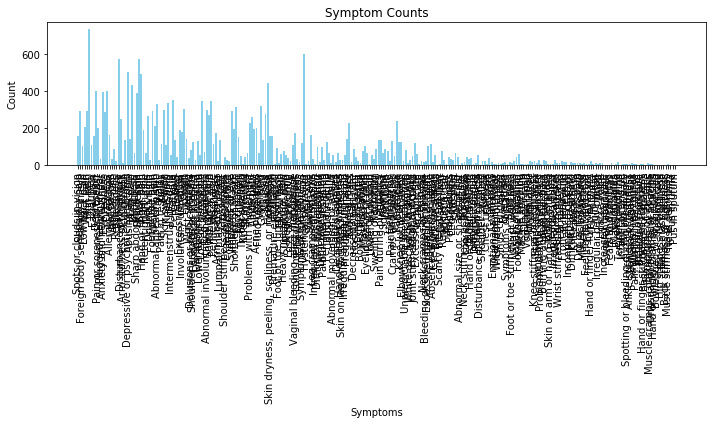

In [148]:
ex_symptom_counts = {}

# 각 증상의 개수 세기
for symptom in ex_symptom_list:
    if symptom in ex_symptom_counts:
        ex_symptom_counts[symptom] += 1
    else:
        ex_symptom_counts[symptom] = 1
        
# 그래프로 표현
plt.figure(figsize=(10, 6))
plt.bar(symptom_counts.keys(), symptom_counts.values(), color='skyblue')
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.title('Symptom Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [157]:
# ex_symptom_counts를 값에 따라 내림차순으로 정렬하여 증상별 개수를 출력
sorted_ex_symptoms = sorted(ex_symptom_counts.items(), key=lambda x: x[1], reverse=True)

print("explicit_inform_slots에 있는 증상 개수: ", len(ex_symptom_counts), "\n")

for symptom, count in sorted_ex_symptoms:
    print(symptom, count)

explicit_inform_slots에 있는 증상 개수:  265 

Skin rash 734
Diminished vision 601
Pain in eye 575
Skin lesion 574
Depressive or psychotic symptoms 502
Back pain 493
Headache 445
Leg pain 432
Dizziness 402
Depression 400
Anxiety and nervousness 396
Sharp abdominal pain 390
Fatigue 353
Loss of sensation 348
Itching of skin 348
Knee pain 337
Abnormal appearing skin 331
Vomiting 321
Shortness of breath 313
Cough 304
Abnormal involuntary movements 300
Fever 298
Shoulder pain 295
Foot or toe pain 293
Wrist pain 290
Symptoms of eye 290
Eye redness 289
Nausea 274
Sharp chest pain 270
Neck pain 263
Infertility 259
Disturbance of memory 251
Paresthesia 240
Ache all over 228
Problems with movement 227
Weight gain 209
Low back pain 208
Acne or pimples 202
Pain or soreness of breast 199
Itchiness of eye 196
Ankle pain 194
Excessive anger 192
Hand or finger pain 189
Involuntary urination 179
Weakness 176
Vaginal bleeding after menopause 174
Allergic reaction 163
Swollen eye 162
Facial pain 159
Arm pain 15

# goal_set.p 의 test data 살펴보기

# disease_symptom  

질병별 증상 모음,  각 질병에 대한 증상과 해당 증상이 발생할 확률에 관한 정보
90개의 질병, 그룹아이디 9개이고 1개당 10개의 질병이 포함됨 

In [207]:
symptom_df = pd.DataFrame(disease_symptom)

In [208]:
symptom_df.shape

(2, 90)

In [209]:
symptom_df.head()  # 90개의 질병 

,Cat scratch disease,Dengue fever,Gas gangrene,Chickenpox,Granuloma inguinale,Chagas disease,Chancroid,Chlamydia,Acariasis,Gonorrhea,Fluid overload,Diabetic ketoacidosis,Amyloidosis,Diabetes insipidus,Diabetic retinopathy,Diabetic peripheral neuropathy,Carcinoid syndrome,Graves disease,Cushing syndrome,Cystic Fibrosis,Conversion disorder,Chronic pain disorder,Acute stress reaction,Factitious disorder,Alcohol intoxication,Eating disorder,Anxiety,Dissociative disorder,Drug abuse cocaine,Adjustment reaction,Cerebral edema,Degenerative disc disease,Guillain Barre syndrome,Complex regional pain syndrome,Amyotrophic lateral sclerosis ALS,Encephalitis,Carpal tunnel syndrome,Extrapyramidal effect of drugs,Essential tremor,Alzheimer disease,Conjunctivitis due to allergy,Ectropion,Endophthalmitis,Cyst of the eyelid,Chalazion,Corneal disorder,Conductive hearing loss,Central retinal artery or vein occlusion,Acute glaucoma,Aphakia,Erythema multiforme,Dyshidrosis,Actinic keratosis,Dermatitis due to sun exposure,Eczema,Contact dermatitis,Diaper rash,Acne,Acanthosis nigricans,Decubitus ulcer,Fibromyalgia,Connective tissue disorder,Ganglion cyst,Ankylosing spondylitis,De Quervain disease,Chronic back pain,Gout,Flat feet,Adhesive capsulitis of the shoulder,Chondromalacia of the patella,Cystitis,Epididymitis,Acute kidney injury,Endometriosis,Erectile dysfunction,Endometrial cancer,Endometrial hyperplasia,Fibrocystic breast disease,Female infertility of unknown cause,Chronic kidney disease,Air embolism,Fat embolism,Drug reaction,Carbon monoxide poisoning,Fracture of the pelvis,Fracture of the rib,Allergy,Concussion,Epidural hemorrhage,Corneal abrasion
index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
symptom,"{'Neck swelling': 0.74, 'Skin swelling': 0.74, 'Groin mass': 0.57, 'Skin rash': 0.57, 'Loss of sensation': 0.57, 'Arm swelling': 0.57, 'Skin lesion': 0.57, 'Headache': 0.57, 'Fever': 0.57, 'Swollen eye': 0.57, 'Arm lump or mass': 0.57, 'Itchy eyelid': 0.05}","{'Sore throat': 1.0, 'Fever': 1.0, 'Shoulder cramps or spasms': 0.32, 'Ankle pain': 0.32, 'Wrist pain': 0.32, 'Pain during pregnancy': 0.32, 'Joint stiffness or tightness': 0.32, 'Excessive anger': 0.32, 'Pain or soreness of breast': 0.32, 'Knee lump or mass': 0.32, 'Facial pain': 0.32, 'Pain in eye': 0.32}","{'Sharp abdominal pain': 1.0, 'Shoulder cramps or spasms': 0.32, 'Excessive anger': 0.32, 'Ankle pain': 0.32, 'Wrist pain': 0.32, 'Pain during pregnancy': 0.32, 'Facial pain': 0.32, 'Joint stiffness or tightness': 0.32, 'Pain or soreness of breast': 0.32, 'Knee lump or mass': 0.32, 'Pain in eye': 0.32, 'Fatigue': 0.32}","{'Skin rash': 0.93, 'Fever': 0.62, 'Abnormal appearing skin': 0.45, 'Itching of skin': 0.4, 'Ache all over': 0.28, 'Cough': 0.28, 'Skin lesion': 0.28, 'Skin swelling': 0.28, 'Pain in testicles': 0.12, 'Problems during pregnancy': 0.12, 'Irritable infant': 0.12, 'Eye redness': 0.12}","{'Nausea': 0.77, 'Sharp chest pain': 0.77, 'Groin pain': 0.77, 'Vaginal pain': 0.77, 'Vulvar sore': 0.11, 'Loss of sex drive': 0.11, 'Knee lump or mass': 0.11, 'Nailbiting': 0.11, 'Excessive growth': 0.11, 'Wrist weakness': 0.11, 'Shoulder swelling': 0.11, 'Neck cramps or spasms': 0.11}","{'Pain in eye': 0.32, 'Shoulder cramps or spasms': 0.32, 'Facial pain': 0.32, 'Ankle pain': 0.32, 'Wrist pain': 0.32, 'Pain during pregnancy': 0.32, 'Excessive anger': 0.32, 'Joint stiffness or tightness': 0.32, 'Pain or soreness of breast': 0.32, 'Knee lump or mass': 0.32, 'Fatigue': 0.32, 'Excessive urination at night': 0.32}","{'Pain in eye': 0.32, 'Shoulder cramps or spasms': 0.32, 'Facial pain': 0.32, 'Ankle pain': 0.32, 'Wrist pain': 0.32, 'Pain during pregnancy': 0.32, 'Excessive anger': 0.32, 'Joint stiffness or tightness': 0.32, 'Pain or soreness of breast': 0.32, 'Knee lump or ma

In [210]:
symptom_df.columns

Index(['Cat scratch disease', 'Dengue fever', 'Gas gangrene', 'Chickenpox',
       'Granuloma inguinale', 'Chagas disease', 'Chancroid', 'Chlamydia',
       'Acariasis', 'Gonorrhea', 'Fluid overload', 'Diabetic ketoacidosis',
       'Amyloidosis', 'Diabetes insipidus', 'Diabetic retinopathy',
       'Diabetic peripheral neuropathy', 'Carcinoid syndrome',
       'Graves disease', 'Cushing syndrome', 'Cystic Fibrosis',
       'Conversion disorder', 'Chronic pain disorder', 'Acute stress reaction',
       'Factitious disorder', 'Alcohol intoxication', 'Eating disorder',
       'Anxiety', 'Dissociative disorder', 'Drug abuse cocaine',
       'Adjustment reaction', 'Cerebral edema', 'Degenerative disc disease',
       'Guillain Barre syndrome', 'Complex regional pain syndrome',
       'Amyotrophic lateral sclerosis ALS', 'Encephalitis',
       'Carpal tunnel syndrome', 'Extrapyramidal effect of drugs',
       'Essential tremor', 'Alzheimer disease',
       'Conjunctivitis due to allergy', '

In [211]:
# symptom_df.dtypes

In [212]:
# symptom_df.isnull().sum().sum()

In [213]:
symptom_transposed = symptom_df.transpose()

In [214]:
symptom_transposed

,index,symptom
Cat scratch disease,0,"{'Neck swelling': 0.74, 'Skin swelling': 0.74, 'Groin mass': 0.57, 'Skin rash': 0.57, 'Loss of sensation': 0.57, 'Arm swelling': 0.57, 'Skin lesion': 0.57, 'Headache': 0.57, 'Fever': 0.57, 'Swollen eye': 0.57, 'Arm lump or mass': 0.57, 'Itchy eyelid': 0.05}"
Dengue fever,1,"{'Sore throat': 1.0, 'Fever': 1.0, 'Shoulder cramps or spasms': 0.32, 'Ankle pain': 0.32, 'Wrist pain': 0.32, 'Pain during pregnancy': 0.32, 'Joint stiffness or tightness': 0.32, 'Excessive anger': 0.32, 'Pain or soreness of breast': 0.32, 'Knee lump or mass': 0.32, 'Facial pain': 0.32, 'Pain in eye': 0.32}"
Gas gangrene,2,"{'Sharp abdominal pain': 1.0, 'Shoulder cramps or spasms': 0.32, 'Excessive anger': 0.32, 'Ankle pain': 0.32, 'Wrist pain': 0.32, 'Pain during pregnancy': 0.32, 'Facial pain': 0.32, 'Joint stiffness or tightness': 0.32, 'Pain or soreness of breast': 0.32, 'Knee lump or mass': 0.32, 'Pain in eye': 0.32, 'Fatigue': 0.32}"
Chickenpox,3,"{'Skin rash': 0.93, 'Fever': 0.62, 'Abnormal appearing skin': 0.45, 'Itching of skin': 0.4, 'Ache all over': 0.28, 'Cough': 0.28, 'Skin lesion': 0.28, 'Skin swelling': 0.28, 'Pain in testicles': 0.12, 'Problems during pregnancy': 0.12, 'Irritable infant': 0.12, 'Eye redness': 0.12}"
Granuloma inguinale,4,"{'Nausea': 0.77, 'Sharp chest pain': 0.77, 'Groin pain': 0.77, 'Vaginal pain': 0.77, 'Vulvar sore': 0.11, 'Loss of sex drive': 0.11, 'Knee lump or mass': 0.11, 'Nailbiting': 0.11, 'Excessive growth': 0.11, 'Wrist weakness': 0.11, 'Shoulder swelling': 0.11, 'Neck cramps or spasms': 0.11}"
...,...,...
Fracture of the rib,85,"{'Rib pain': 0.81, 'Sharp chest pain': 0.61, 'Back pain': 0.49, 'Side pain': 0.36, 'Shoulder pain': 0.32, 'Ache all over': 0.29, 'Arm pain': 0.24, 'Shortness of breath': 0.24, 'Hurts to breath': 0.22, 'Hip pain': 0.17, 'Bones are painful': 0.06, 'Back mass or lump': 0.02}"
Allergy,86,"{'Skin rash': 0.85, 'Allergic reaction': 0.65, 'Itching of skin': 0.61, 'Peripheral edema': 0.28, 'Abnormal appearing skin': 0.27, 'Cough': 0.26, 'Swollen eye': 0.24, 'Lip swelling': 0.2, 'Skin swelling': 0.13, 'Itchiness of eye': 0.1, 'Fluid retention': 0.09, 'Swollen tongue': 0.09}"
Concussion,87,"{'Headache': 0.83, 'Dizziness': 0.49, 'Neck pain': 0.45, 'Vomiting': 0.31, 'Disturbance of memory': 0.3, 'Nausea': 0.29, 'Back pain': 0.28, 'Facial pain': 0.15, 'Sleepiness': 0.11, 'Rib pain': 0.08, 'Double vision': 0.06, 'Difficulty speaking': 0.05}"
Epidural hemorrhage,88,"{'Back pain': 0.63, 'Depressive or psychotic symptoms': 0.63, 'Side pain': 0.45, 'Dizziness': 0.45, 'Leg pain': 0.45, 'Diminished hearing': 0.45, 'Elbow weakness': 0.03, 'Excessive growth': 0.03, 'Low back weakness': 0.03, 'Feeling hot and cold': 0.03, 'Wrist weakness': 0.03, 'Emotional symptoms': 0.03}"


In [216]:
# 각 증상별 질병을 모으기 위한 딕셔너리 생성
symptom_diseases = {}

# 각 증상을 순회하면서 해당 증상을 가진 질병들을 모음
for index, row in symptom_transposed.iterrows():
    for symptom, score in row['symptom'].items():
        if symptom not in symptom_diseases:
            symptom_diseases[symptom] = set()  # 각 증상별 질병을 저장할 빈 집합 생성
        if score >= 0.5:  # 증상이 충분히 높은 점수를 가진 경우에만 질병에 추가
            symptom_diseases[symptom].add(index)

# 결과 출력
for symptom, diseases in symptom_diseases.items():
    print(f"{symptom}: {diseases}")

Neck swelling: {'Cat scratch disease'}
Skin swelling: {'Cat scratch disease'}
Groin mass: {'Cat scratch disease'}
Skin rash: {'Cat scratch disease', 'Chickenpox', 'Allergy', 'Eczema', 'Erythema multiforme', 'Acariasis', 'Contact dermatitis', 'Dyshidrosis', 'Drug reaction'}
Loss of sensation: {'Cat scratch disease', 'Complex regional pain syndrome', 'Factitious disorder', 'Encephalitis', 'Carpal tunnel syndrome'}
Arm swelling: {'Cat scratch disease'}
Skin lesion: {'Dermatitis due to sun exposure', 'Actinic keratosis', 'Cat scratch disease', 'Decubitus ulcer'}
Headache: {'Concussion', 'Cat scratch disease', 'Cerebral edema', 'Encephalitis', 'Carbon monoxide poisoning'}
Fever: {'Cat scratch disease', 'Dengue fever', 'Chickenpox', 'Erythema multiforme'}
Swollen eye: {'Endophthalmitis', 'Cat scratch disease'}
Arm lump or mass: {'Cat scratch disease'}
Itchy eyelid: set()
Sore throat: {'Dengue fever'}
Shoulder cramps or spasms: {'Fat embolism', 'Air embolism'}
Ankle pain: {'Fat embolism', 'Ai

In [217]:
# 각 증상별 질병을 모으기 위한 딕셔너리 생성
symptom_diseases = {}

# 각 증상을 순회하면서 해당 증상을 가진 질병들을 모음
for index, row in symptom_transposed.iterrows():
    for symptom, score in row['symptom'].items():
        if symptom not in symptom_diseases:
            symptom_diseases[symptom] = set()  # 각 증상별 질병을 저장할 빈 집합 생성
            symptom_diseases[symptom].add(index)

# 결과 출력
for symptom, diseases in symptom_diseases.items():
    print(f"{symptom}: {diseases}")

Neck swelling: {'Cat scratch disease'}
Skin swelling: {'Cat scratch disease'}
Groin mass: {'Cat scratch disease'}
Skin rash: {'Cat scratch disease'}
Loss of sensation: {'Cat scratch disease'}
Arm swelling: {'Cat scratch disease'}
Skin lesion: {'Cat scratch disease'}
Headache: {'Cat scratch disease'}
Fever: {'Cat scratch disease'}
Swollen eye: {'Cat scratch disease'}
Arm lump or mass: {'Cat scratch disease'}
Itchy eyelid: {'Cat scratch disease'}
Sore throat: {'Dengue fever'}
Shoulder cramps or spasms: {'Dengue fever'}
Ankle pain: {'Dengue fever'}
Wrist pain: {'Dengue fever'}
Pain during pregnancy: {'Dengue fever'}
Joint stiffness or tightness: {'Dengue fever'}
Excessive anger: {'Dengue fever'}
Pain or soreness of breast: {'Dengue fever'}
Knee lump or mass: {'Dengue fever'}
Facial pain: {'Dengue fever'}
Pain in eye: {'Dengue fever'}
Sharp abdominal pain: {'Gas gangrene'}
Fatigue: {'Gas gangrene'}
Abnormal appearing skin: {'Chickenpox'}
Itching of skin: {'Chickenpox'}
Ache all over: {'Chi

In [218]:
len(symptom_diseases)

266